In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

%matplotlib inline

In [19]:
#reading the file and storing in a dataframe
bike_df = pd.read_csv('data/hour.csv')
bikedata_day_df = pd.read_csv('data/day.csv')
bikedata_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : whether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [3]:
#cleaning the data
#removing few columns
bike_df_mod = bike_df.drop(['instant','yr','casual','registered'], axis = 1)
bike_df_mod.head()

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1/1/2011,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1/1/2011,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1/1/2011,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1/1/2011,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1/1/2011,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [4]:
bike_df_mod.count()

dteday        17379
season        17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64

In [5]:

#temp was normalized by dividing by 41 in original dataset.we are multiplying by 41 to get the real values in C
temp_c=bike_df_mod['temp']*41

#converting to F
temp_f = round((temp_c *9/5) + 32,2)

#writting the temp_f values to the temp_f column
bike_df_mod['temp_f'] = temp_f


#atemp(feeling like tempearture) was normalized by dividing by 50 in original dataset.
#we are multiplying by 50 to get the real values in C
atemp_c=bike_df_mod['atemp']*50

#converting to F
atemp_f = round((atemp_c *9/5) + 32,2)

#writting the atemp_f values to the atemp_f column
bike_df_mod['atemp_f'] = atemp_f


#humidity was normalized by dividing by 100 in original dataset
#we are multiplying by 100 and writing it to the column hum1
bike_df_mod['hum1']=bike_df_mod['hum']*100

#windspeed was normalized by dividing by 67 in original dataset.
#we are multiplying by 67 and writing it to the column windspeed1
bike_df_mod['winspeed1']=round(bike_df_mod['windspeed']*67,2)

#dropping the original columns temp,atemp, hum, windspeed
bike_data = bike_df_mod.drop(['temp','atemp','hum','windspeed'],axis = 1)
bike_data.head()

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,cnt,temp_f,atemp_f,hum1,winspeed1
0,1/1/2011,1,1,0,0,6,0,1,16,49.71,57.91,81.0,0.0
1,1/1/2011,1,1,1,0,6,0,1,40,48.24,56.54,80.0,0.0
2,1/1/2011,1,1,2,0,6,0,1,32,48.24,56.54,80.0,0.0
3,1/1/2011,1,1,3,0,6,0,1,13,49.71,57.91,75.0,0.0
4,1/1/2011,1,1,4,0,6,0,1,1,49.71,57.91,75.0,0.0


NormaltestResult(statistic=5.2477046963997624, pvalue=0.07252294037543752)


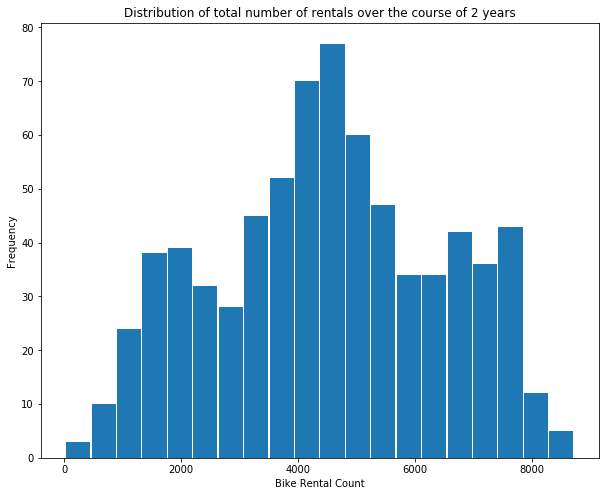

In [6]:
# Distribution of 'cnt' (count) variable
plt.subplots(figsize = (10,8))

#'Bike_Data' dataframe has values for each hour for each day from 1/1/2011 to 12/19/2020.

#Grouping the 'bike_data' dataframe by 'dteday'(date) variable and finding the sum of 'cnt' (count) variable for each day.
count_per_day = bike_data.groupby('dteday')['cnt'].sum()

#converting to a dataframe
count_per_day = pd.DataFrame(count_per_day)

#plotting a histogram of the 'cnt' 
plt.hist(count_per_day['cnt'],bins = 20,rwidth=0.95)

#Assigning labels and title
plt.xlabel("Bike Rental Count")
plt.ylabel("Frequency")
plt.title("Distribution of total number of rentals over the course of 2 years")

#saving the figure
plt.savefig('analysis_result/bike_rental_count_distribution.png')

# Characterize the data set using matplotlib and stats.normaltest
print(stats.normaltest(count_per_day['cnt'].sample(100)))

In [31]:
weathersit_pie = bikedata_day_df.groupby(['weathersit'])
weathersit_pie.count()

registered_weathersit = weathersit_pie['registered'].sum()
casual_weathersit = weathersit_pie['casual'].sum()

ilocd_cas_weathersit = casual_weathersit.iloc[1]
ilocd_reg_weathersit = registered_weathersit.iloc[1]


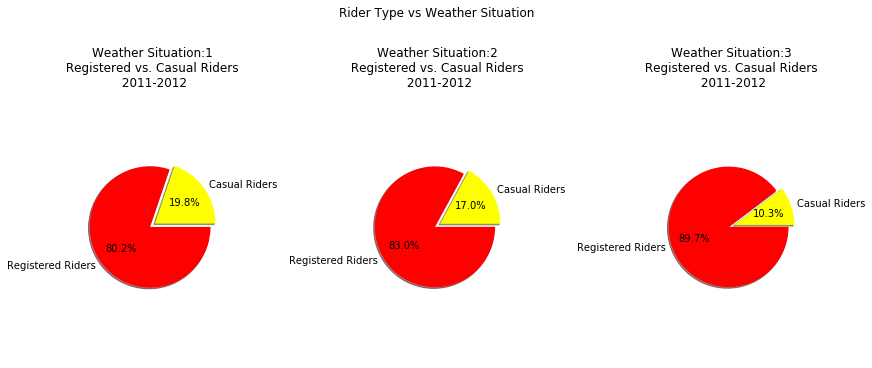

In [42]:
riders = ['Casual Riders', 'Registered Riders']
colors = ['yellow', 'red']
explode = (0.1, 0)


fig, plts = plt.subplots(1,3, figsize=(12,5), constrained_layout=True)
# plt.subplots_adjust(hspace=None)
fig.suptitle('Rider Type vs Weather Situation\n')


weathersits = [1,2,3]

for weathersit in weathersits:
    loopregistered = registered_weathersit[weathersit]
    loopcasual = casual_weathersit[weathersit]
    counts = [loopcasual, loopregistered]
    
#     autotexts= plts(counts, labels=riders, autopct='%.0f%%', textprops={'size': 'smaller'}, shadow=True, radius=0.5)

    plts[weathersit-1].pie(counts, explode=explode, labels=riders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
    plts[weathersit-1].set_title(f'Weather Situation:{weathersit}\n Registered vs. Casual Riders \n 2011-2012')
    plts[weathersit-1].axis("equal")



plt.savefig('weathersit.png')

plt.show()

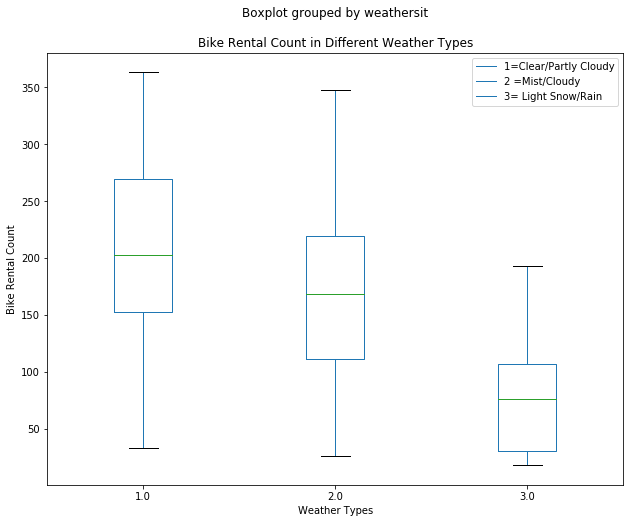

In [7]:
# Now we will see the relation bewteen count and weather

#'bike_data' dataframe is grouped by 'dteday'(date) and we are finding bike riders count for each weather.
count_per_day_weather = round(bike_data.groupby('dteday').agg({'weathersit':'mean','cnt':'mean'}),0)

#converting to a dataframe
count_per_day_weather = pd.DataFrame(count_per_day_weather)

#plotting a boxplot for 'cnt' (count) by weather. 
count_per_day_weather.boxplot('cnt',by='weathersit',grid = False, figsize = (10,8))

#assigning legend, labels and title
plt.legend(labels = ['1=Clear/Partly Cloudy','2 =Mist/Cloudy','3= Light Snow/Rain'],loc= 'best')
plt.xlabel("Weather Types")
plt.ylabel("Bike Rental Count")
plt.title("Bike Rental Count in Different Weather Types")

#saving the figure
plt.savefig('analysis_result/count_vs_weather.png')


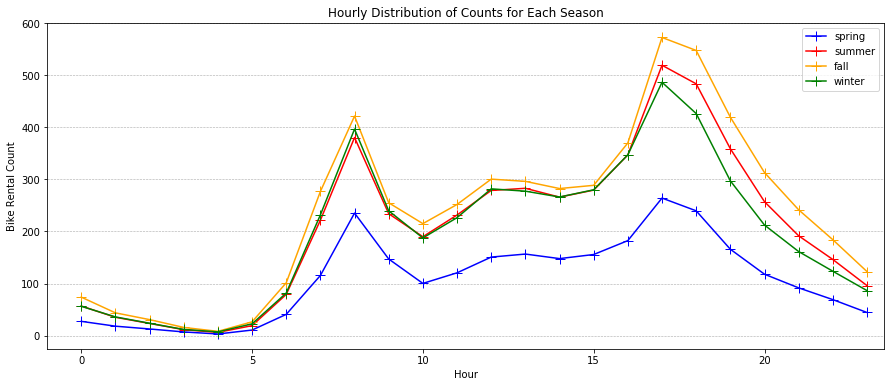

In [8]:
#SeasonWise Hourly distribution of Bike Riders Count

#We group the 'bike_data' dataframe by 'season' and 'hr'(hour)
#and we find the mean of 'cnt' variable for each hour for 2 yrs(1/1/2011 to 12/19/2012)

season_hour_count= bike_data.groupby(['season','hr']).agg({'cnt':'mean'})

#converting to a Dataframe
season_hour_count=pd.DataFrame(season_hour_count)

#we reset the index , so that we will get 'season' and 'cnt'  and 'hr' as columns
season_hour_count= season_hour_count.reset_index()

#we extract data for each season (1= spring, 2= summer, 3= fall, 4= winter)
season1 = season_hour_count[season_hour_count['season'] == 1]
season2 = season_hour_count[season_hour_count['season'] == 2]
season3 = season_hour_count[season_hour_count['season'] == 3]
season4 = season_hour_count[season_hour_count['season'] == 4]

plt.figure(figsize=(15,6))

#we do line plot for each season separately for cnt vs hr
plt.plot(season1['hr'],season1['cnt'],marker = '+',markersize = 10,color = 'blue',alpha= 1,label='spring')
plt.plot(season2['hr'],season2['cnt'],marker = '+',markersize = 10,color = 'red',alpha= 1,label= 'summer')
plt.plot(season3['hr'],season3['cnt'],marker = '+',markersize = 10,color = 'orange',alpha= 1,label = 'fall')
plt.plot(season4['hr'],season4['cnt'],marker = '+',markersize = 10,color = 'green',alpha= 1,label = 'winter')

#setting the x limit
plt.xlim(-1,23.5)

#assigning grid
plt.grid(axis = 'y', linestyle='--', linewidth=0.6)

#assigning legend, lables and title
plt.legend(loc = "best")
plt.xlabel("Hour")
plt.ylabel("Bike Rental Count")
plt.title("Hourly Distribution of Counts for Each Season")

#saving the figure
plt.savefig('analysis_result/hourly_distribution_count_seasonwise.png')



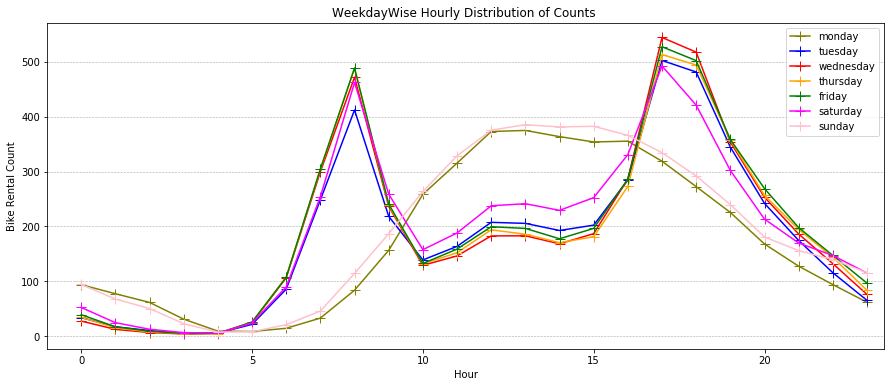

In [9]:
#Weekday wise Hourly distribution of Bike Riders Count

#We group the 'bike_data' dataframe by 'weekday' and 'hr'(hour)
#and we find the mean of 'cnt' variable for each hour for 2 yrs(1/1/2011 to 12/19/2012)
weekday_hour_count= bike_data.groupby(['weekday','hr']).agg({'cnt':'mean'})

#converting to a Dataframe
weekday_hour_count=pd.DataFrame(weekday_hour_count)

#we reset the index , so that we will get 'weekday' and 'cnt'  and 'hr' as columns
weekday_hour_count= weekday_hour_count.reset_index()

#we extract data for each season (1= spring, 2= summer, 3= fall, 4= winter)
day0 = weekday_hour_count[weekday_hour_count['weekday'] == 0]
day1 = weekday_hour_count[weekday_hour_count['weekday'] == 1]
day2 = weekday_hour_count[weekday_hour_count['weekday'] == 2]
day3 = weekday_hour_count[weekday_hour_count['weekday'] == 3]
day4 = weekday_hour_count[weekday_hour_count['weekday'] == 4]
day5 = weekday_hour_count[weekday_hour_count['weekday'] == 5]
day6 = weekday_hour_count[weekday_hour_count['weekday'] == 6]

plt.figure(figsize=(15,6))

#we do line plot for each weekday separately for cnt vs hr
plt.plot(day0['hr'],day0['cnt'],marker = '+',markersize = 10,color = 'olive',alpha= 1,label='monday')
plt.plot(day1['hr'],day1['cnt'],marker = '+',markersize = 10,color = 'blue',alpha= 1,label='tuesday')
plt.plot(day2['hr'],day2['cnt'],marker = '+',markersize = 10,color = 'red',alpha= 1,label= 'wednesday')
plt.plot(day3['hr'],day3['cnt'],marker = '+',markersize = 10,color = 'orange',alpha= 1,label = 'thursday')
plt.plot(day4['hr'],day4['cnt'],marker = '+',markersize = 10,color = 'green',alpha= 1,label = 'friday')
plt.plot(day5['hr'],day5['cnt'],marker = '+',markersize = 10,color = 'magenta',alpha= 1,label = 'saturday')
plt.plot(day6['hr'],day6['cnt'],marker = '+',markersize = 10,color = 'pink',alpha= 1,label = 'sunday')

#setting the x limit
plt.xlim(-1,23.5)

#assigning grid
plt.grid(axis = 'y', linestyle='--', linewidth=0.6)

#assigning legend, lables and title
plt.legend(loc = "best")
plt.xlabel("Hour")
plt.ylabel("Bike Rental Count")
plt.title("WeekdayWise Hourly Distribution of Counts ")

#saving the figure
plt.savefig('analysis_result/hourly_distribution_count_weekly.png')


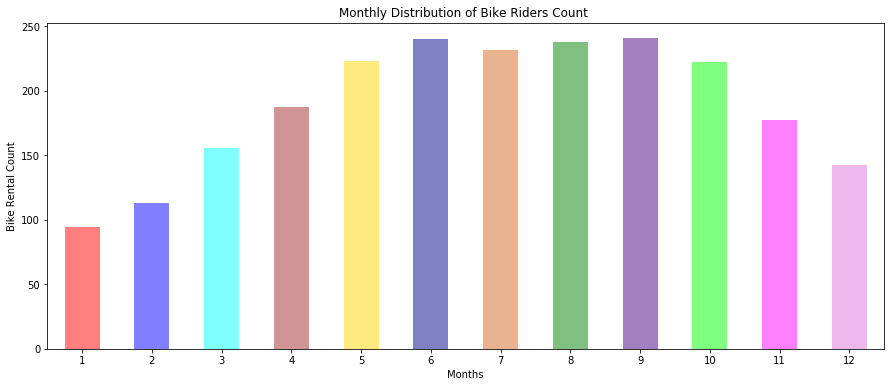

In [10]:
#Monthly Distribution of Bike Riders Count

#We group the 'bike_data' dataframe by 'mnth' 
#and we find the mean of 'cnt' variable for 2 yrs(1/1/2011 to 12/19/2012) for every month
count_per_month = bike_data.groupby('mnth')['cnt'].mean()

#converting to a Dataframe
count_per_month = pd.DataFrame(count_per_month)

#we reset the index , so that we will get 'mnth' and 'cnt' as columns
count_per_month= count_per_month.reset_index()

#setting the colors for my month bars
my_colors = ['red','blue','aqua','brown','gold','darkblue','chocolate','green','indigo','lime','magenta','orchid']

#plotting a bar plot for month and count
my_plot = count_per_month.plot('mnth','cnt',kind= 'bar',figsize = (15,6),color=my_colors,alpha = 0.5,legend = False,rot = 0)

#setting labels and title
my_plot.set_xlabel("Months")
my_plot.set_ylabel("Bike Rental Count")
my_plot.set_title("Monthly Distribution of Bike Riders Count ")

#saving the figure
plt.savefig('analysis_result/monthly_count.png')



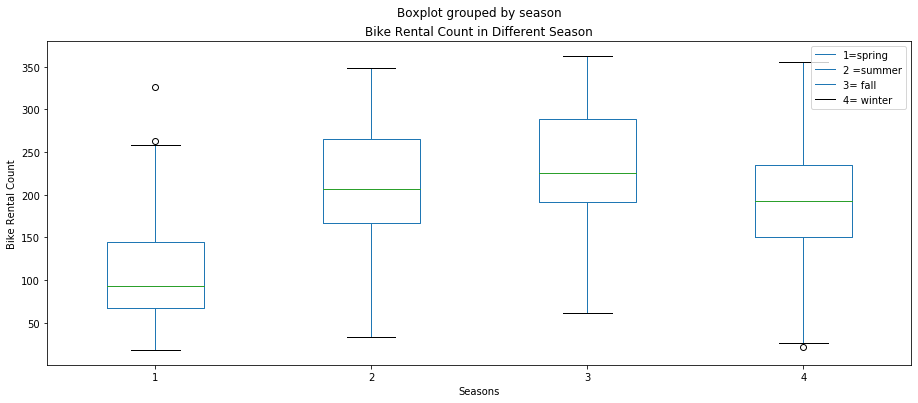

In [11]:
#Bike Riders Count in Different Season

#We group the 'bike_data' dataframe by 'dteday'(date) 
#and we find the mean of 'cnt' variable for each season for 2 yrs(1/1/2011 to 12/19/2012)
count_per_day_season = round(bike_data.groupby('dteday').agg({'season':'mean','cnt':'mean'}),0)

#making a DataFrame
count_per_day_season = pd.DataFrame(count_per_day_season)

#Doing a boxplot for 'cnt'(count) by 'season'
count_per_day_season.boxplot('cnt',by='season',grid = False, figsize = (15,6))

#assigning the legends, labels and title
plt.legend(labels = ['1=spring','2 =summer','3= fall','4= winter'],loc = 'upper right')
plt.xlabel("Seasons")
plt.ylabel("Bike Rental Count")
plt.title("Bike Rental Count in Different Season")

#saving the figure
plt.savefig('analysis_result/count_vs_season.png')

In [12]:
# Finding the quartiles and outliers for every season 

#we group the bike_data by 'season' and 'dteday'(date) and we find the mean of 'cnt'(count)
season_day_count= bike_data.groupby(['season','dteday']).agg({'cnt':'mean'})

#making a dataframe
season_day_count=pd.DataFrame(season_day_count)

#we reset the index for our season_day_count dataframe so that 'season', 'dteday' and 'cnt' are columns
season_day_count= season_day_count.reset_index()

#we calculate outliers for each season separately

#extracting data only for spring
season1_spring = season_day_count[season_day_count['season'] == 1]

#'cnt' only for spring
count_spring = season1_spring['cnt']

#finding quartiles for count_spring
quartiles_spring =count_spring.quantile([.25,.5,.75])

#finding lower and upper quartiles and inter quartile range (iqr)
lowerq_spring = quartiles_spring[0.25]
upperq_spring = quartiles_spring[0.75]
iqr_spring = upperq_spring-lowerq_spring

#finding the lower bound and upper bound
lower_bound_spring = lowerq_spring - (1.5*iqr_spring)
upper_bound_spring = upperq_spring + (1.5*iqr_spring)

print(f"The the median of bike rental count in spring is: {round(quartiles_spring[0.5],3)} ")
print(f"Values below {round(lower_bound_spring,3)} could be outliers.")
print(f"Values above {round(upper_bound_spring,3)} could be outliers.")
print('--------------------------------------------------------')

#extracting data only for summer
season2_summer = season_day_count[season_day_count['season'] == 2]

#'cnt' only for summer
count_summer = season2_summer['cnt']

#finding quartiles for count_summer
quartiles_summer =count_summer.quantile([.25,.5,.75])

#finding lower and upper quartiles and inter quartile range (iqr)
lowerq_summer = quartiles_summer[0.25]
upperq_summer = quartiles_summer[0.75]
iqr_summer = upperq_summer-lowerq_summer


#finding the lower bound and upper bound
lower_bound_summer = lowerq_summer - (1.5*iqr_summer)
upper_bound_summer = upperq_summer + (1.5*iqr_summer)

print(f"The the median of bike rental count in summer is: {round(quartiles_summer[0.5],3)} ")
print(f"Values below {round(lower_bound_summer,3)} could be outliers.")
print(f"Values above {round(upper_bound_summer,3)} could be outliers.")
print('------------------------------------------------------------')

#extracting data only for fall
season3_fall = season_day_count[season_day_count['season'] == 3]

#'cnt' only for fall
count_fall = season3_fall['cnt']

#finding quartiles for count_fall
quartiles_fall =count_fall.quantile([.25,.5,.75])

#finding lower and upper quartiles and inter quartile range (iqr)
lowerq_fall = quartiles_fall[0.25]
upperq_fall = quartiles_fall[0.75]
iqr_fall = upperq_fall-lowerq_fall

#finding the lower bound and upper bound
lower_bound_fall = lowerq_fall - (1.5*iqr_fall)
upper_bound_fall = upperq_fall + (1.5*iqr_fall)

print(f"The the median of bike rental count in fall is: {round(quartiles_fall[0.5],3)} ")
print(f"Values below {round(lower_bound_fall,3)} could be outliers.")
print(f"Values above {round(upper_bound_fall,3)} could be outliers.")
print('------------------------------------------------------------')

#extracting data only for winter
season4_winter = season_day_count[season_day_count['season'] == 4]

#'cnt' only for winter
count_winter = season4_winter['cnt']

#finding quartiles for count_winter
quartiles_winter =count_winter.quantile([.25,.5,.75])

#finding lower and upper quartiles and inter quartile range (iqr)
lowerq_winter = quartiles_winter[0.25]
upperq_winter = quartiles_winter[0.75]
iqr_winter = upperq_winter-lowerq_winter

#finding the lower bound and upper bound
lower_bound_winter = lowerq_winter - (1.5*iqr_winter)
upper_bound_winter = upperq_winter + (1.5*iqr_winter)

print(f"The the median of bike rental count in winter is: {round(quartiles_winter[0.5],3)} ")
print(f"Values below {round(lower_bound_winter,3)} could be outliers.")
print(f"Values above {round(upper_bound_winter,3)} could be outliers.")
print('------------------------------------------------------------')



The the median of bike rental count in spring is: 93.167 
Values below -48.826 could be outliers.
Values above 259.696 could be outliers.
--------------------------------------------------------
The the median of bike rental count in summer is: 206.958 
Values below 18.417 could be outliers.
Values above 414.083 could be outliers.
------------------------------------------------------------
The the median of bike rental count in fall is: 225.521 
Values below 45.203 could be outliers.
Values above 434.828 could be outliers.
------------------------------------------------------------
The the median of bike rental count in winter is: 193.104 
Values below 25.083 could be outliers.
Values above 359.917 could be outliers.
------------------------------------------------------------


The correlation between both factors is 0.63


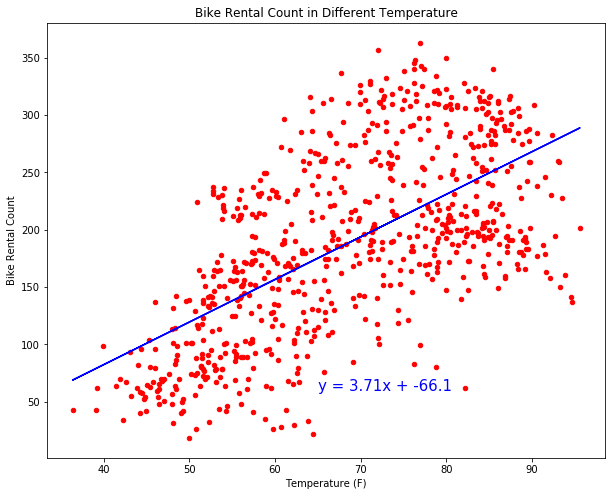

In [13]:
#Bike riders count in different temperatures

#we group the bike_data by 'dteday'(date) and we find mean for 'cnt' for every temp
count_temp =round(bike_data.groupby('dteday').agg({'temp_f':'mean','cnt':'mean'}),2)

#making a DataFrame
count_temp = pd.DataFrame(count_temp)

#doing a scatter plot for temp_f and 'cnt'
count_temp.plot('temp_f','cnt',kind = 'scatter',color='red',figsize=(10,8))

#assigning the labels and title
plt.xlabel("Temperature (F)")
plt.ylabel("Bike Rental Count")
plt.title("Bike Rental Count in Different Temperature")

#finding the correlation factor between temp and 'cnt' 
correlation = stats.pearsonr(count_temp['temp_f'],count_temp['cnt'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

# finding the values for linregress study on temp_f and 'cnt'
(slope, intercept, rvalue, pvalue, stderr) = linregress(count_temp['temp_f'], count_temp['cnt'])

#finding the regress fit
regress_values = count_temp['temp_f'] * slope + intercept

#forming the line_eq to annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#line plot for the temp_f and regress fit 
plt.plot(count_temp['temp_f'],regress_values,"b-")

#annotating the line_eq in our figure
plt.annotate(line_eq,(65,60),fontsize=15,color="blue")

#saving the figure
plt.savefig('analysis_result/Count_vs_Temp.png')

In [14]:

bike_data_renamed = bike_data.rename(columns = {'dteday':'Date','season':'Season','mnth':'Month','hr':'Hour','holiday':'Holiday','weekday':'WeekDay',
                                       'workingday':'WorkingDay','weathersit':'WeatherType','cnt':'Count','temp_f':'Temp(F)',
                                        'atemp_f':'ATemp(F)','hum1':'Humidity','winspeed1':'WindSpeed'})
#bike_data_renamed = bike_data_renamed[['Date','Season','Month','Hour','Holiday','Weekday','WorkingDay','WeatherType',
#                                      'Temp(F)','ATemp(F)','Humidity','Windspeed','Count']]

bike_data_renamed1 =bike_data_renamed[['Date', 'Season', 'Month', 'Hour', 'Holiday', 'WeekDay', 'WorkingDay',
       'WeatherType', 'Temp(F)', 'ATemp(F)', 'Humidity', 'WindSpeed', 'Count']]
bike_data_renamed1.head()

,Date,Season,Month,Hour,Holiday,WeekDay,WorkingDay,WeatherType,Temp(F),ATemp(F),Humidity,WindSpeed,Count
0,1/1/2011,1,1,0,0,6,0,1,49.71,57.91,81.0,0.0,16
1,1/1/2011,1,1,1,0,6,0,1,48.24,56.54,80.0,0.0,40
2,1/1/2011,1,1,2,0,6,0,1,48.24,56.54,80.0,0.0,32
3,1/1/2011,1,1,3,0,6,0,1,49.71,57.91,75.0,0.0,13
4,1/1/2011,1,1,4,0,6,0,1,49.71,57.91,75.0,0.0,1


In [15]:
bike_df = round(bike_data_renamed1.drop('ATemp(F)',axis = 1).groupby('Date').mean(),0)

# Trying to make a correlation matrix

corrMatrix = round(bike_df.corr(),2)
#print(corrMatrix)


corrMatrix.style.background_gradient(cmap='coolwarm')

,Season,Month,Hour,Holiday,WeekDay,WorkingDay,WeatherType,Temp(F),Humidity,WindSpeed,Count
Season,1,0.83,-0.05,-0.01,-0,0.01,0.02,0.33,0.2,-0.23,0.41
Month,0.83,1,-0.06,0.02,0.01,-0.01,0.05,0.22,0.22,-0.21,0.28
Hour,-0.05,-0.06,1,-0,-0,0.01,-0.09,-0.05,-0.03,-0.09,0.01
Holiday,-0.01,0.02,-0,1,-0.1,-0.25,-0.03,-0.03,-0.02,0.01,-0.07
WeekDay,-0,0.01,-0,-0.1,1,0.04,0.02,-0,-0.05,0.02,0.06
WorkingDay,0.01,-0.01,0.01,-0.25,0.04,1,0.07,0.05,0.03,-0.02,0.06
WeatherType,0.02,0.05,-0.09,-0.03,0.02,0.07,1,-0.12,0.59,0.03,-0.29
Temp(F),0.33,0.22,-0.05,-0.03,-0,0.05,-0.12,1,0.13,-0.16,0.63
Humidity,0.2,0.22,-0.03,-0.02,-0.05,0.03,0.59,0.13,1,-0.25,-0.1
WindSpeed,-0.23,-0.21,-0.09,0.01,0.02,-0.02,0.03,-0.16,-0.25,1,-0.23


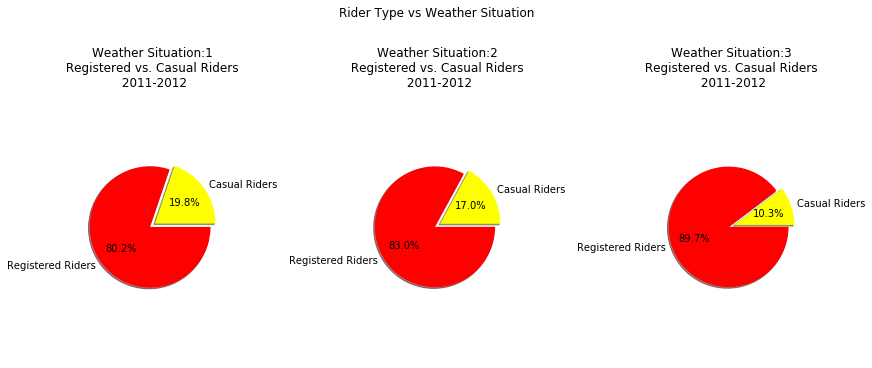